<a href="https://colab.research.google.com/github/Tariqul057/ML-475/blob/Lab-Works/Lab_Task_05(GD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam


In [2]:
# Load the California housing dataset
housing_data = fetch_california_housing()
X = housing_data.data[:, 0].reshape(-1, 1)  # Use only one input feature (e.g., median income)
y = housing_data.target  # House prices

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
def build_ann(n_neurons, optimizer):
    model = Sequential()
    model.add(Dense(n_neurons, input_dim=1, activation='sigmoid'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


In [5]:
# Define the number of neurons in the hidden layer
n_neurons = 10

# Gradient Descent
gd_optimizer = SGD(learning_rate=0.01)
model_gd = build_ann(n_neurons, gd_optimizer)
history_gd = model_gd.fit(X_train_scaled, y_train, epochs=10, verbose=0)

# Stochastic Gradient Descent
sgd_optimizer = SGD(learning_rate=0.01)
model_sgd = build_ann(n_neurons, sgd_optimizer)
history_sgd = model_sgd.fit(X_train_scaled, y_train, epochs=10, batch_size=1, verbose=0)

# Adam Optimizer
adam_optimizer = Adam(learning_rate=0.01)
model_adam = build_ann(n_neurons, adam_optimizer)
history_adam = model_adam.fit(X_train_scaled, y_train, epochs=10, verbose=0)


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


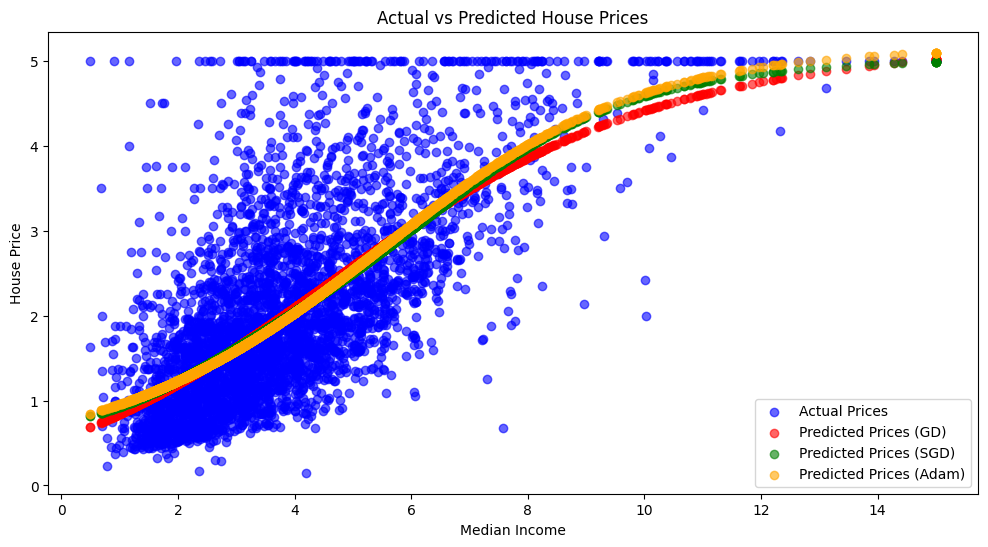

In [6]:
# Predict on test data
y_pred_gd = model_gd.predict(X_test_scaled)
y_pred_sgd = model_sgd.predict(X_test_scaled)
y_pred_adam = model_adam.predict(X_test_scaled)

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices', alpha=0.6)
plt.scatter(X_test, y_pred_gd, color='red', label='Predicted Prices (GD)', alpha=0.6)
plt.scatter(X_test, y_pred_sgd, color='green', label='Predicted Prices (SGD)', alpha=0.6)
plt.scatter(X_test, y_pred_adam, color='orange', label='Predicted Prices (Adam)', alpha=0.6)
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.legend()
plt.show()


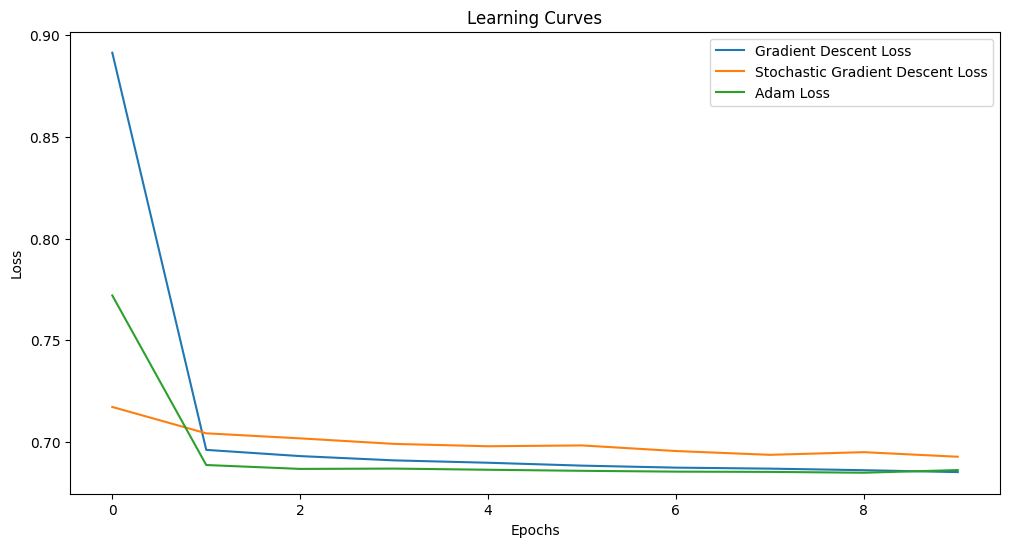

In [7]:
# Plot Learning Curves
plt.figure(figsize=(12, 6))
plt.plot(history_gd.history['loss'], label='Gradient Descent Loss')
plt.plot(history_sgd.history['loss'], label='Stochastic Gradient Descent Loss')
plt.plot(history_adam.history['loss'], label='Adam Loss')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:
# This is a conceptual approach to log weights during each iteration
class WeightLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Extract weights
        weights = self.model.get_weights()
        print(f"Epoch {epoch}, Weights: {weights}, Loss: {logs['loss']}")

# Re-train the model with WeightLogger callback for each optimizer
model_gd.fit(X_train_scaled, y_train, epochs=10, verbose=0, callbacks=[WeightLogger()])
model_sgd.fit(X_train_scaled, y_train, epochs=10, batch_size=1, verbose=0, callbacks=[WeightLogger()])
model_adam.fit(X_train_scaled, y_train, epochs=10, verbose=0, callbacks=[WeightLogger()])


Epoch 0, Weights: [array([[-0.5926157 ,  0.43979907,  0.7715524 , -0.4631857 ,  0.56410915,
         0.915444  ,  0.16183192,  0.7259015 ,  0.24055809,  0.04429363]],
      dtype=float32), array([ 0.06932804, -0.06398197, -0.5536136 ,  0.11540341, -0.28257453,
       -0.861555  ,  0.01040202, -0.48018858, -0.05173493,  0.02636484],
      dtype=float32), array([[-0.10174569],
       [ 0.07421244],
       [ 0.97589684],
       [-0.73654073],
       [ 1.1472601 ],
       [ 1.3644927 ],
       [ 0.41710544],
       [ 0.93526554],
       [-0.0296945 ],
       [ 0.39773843]], dtype=float32), array([0.46607873], dtype=float32)], Loss: 0.6826557517051697
Epoch 1, Weights: [array([[-0.5934969 ,  0.44051334,  0.7807691 , -0.47114488,  0.5769538 ,
         0.92784786,  0.16423613,  0.735102  ,  0.24028242,  0.04564629]],
      dtype=float32), array([ 0.06978486, -0.06465862, -0.5606954 ,  0.1192571 , -0.28958076,
       -0.87177074,  0.00809225, -0.48678616, -0.05185952,  0.02409666],
      dtype